In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt



In [3]:
df = pd.read_csv("us-counties.csv")



In [4]:
Georgia    = df[df.state == "Georgia"]
Alabama = df[df.state == "Alabama"]




In [5]:
#np.sort(Alabama.county.unique())


In [131]:
border_AL = np.array([
"Cleburne",
"Henry",
"Barbour",
"Randolph",
"Cherokee",
"Chambers",
"Russell",
"Houston",
])




In [132]:
agg_AL = Alabama[Alabama.county.isin(border_AL)]

In [133]:
agg_AL.index = agg_AL.date.astype("datetime64").values

In [134]:
agg_AL.groupby("date").mean()

,fips,cases,deaths
date,,,
2020-03-19,1017.00,1.000,0.000
2020-03-20,1017.00,1.000,0.000
2020-03-21,1017.00,1.000,0.000
2020-03-22,1017.00,2.000,0.000
2020-03-23,1043.00,1.500,0.000
...,...,...,...
2020-11-08,1053.75,1527.625,18.250
2020-11-09,1053.75,1534.500,18.250
2020-11-10,1053.75,1544.375,18.375


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



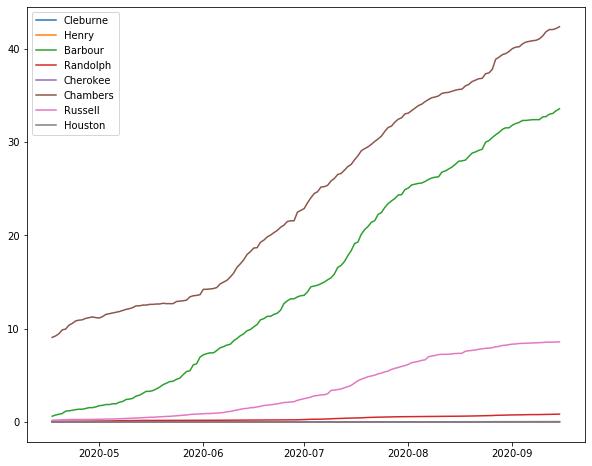

In [135]:
start_date = dt.date(2020,6,16)
end_date = dt.date(2020,8,16)

agg_AL = Alabama[Alabama.county.isin(border_AL)]
agg_AL.index = agg_AL.date.astype("datetime64").values
agg_AL["week"] = agg_AL.date.astype("datetime64").dt.week
plt.figure(figsize = (10,8))
agg_AL = agg_AL[(agg_AL.index > "2020-04-16") & (agg_AL.index < "2020-9-16") ]

al_pop = [
14910,
17205,
24,686,
22722,
26,196,
51626,
33,254,
57961,
71513,
105882,
164542,
]
for i,county in enumerate(border_AL):
    data = agg_AL[agg_AL.county == county]
    plt.plot(data.index,data.cases/al_pop[i],label = str(county))
plt.legend()
plt.show()



In [136]:
end_date

datetime.date(2020, 8, 16)

In [146]:
border_GA = np.array([
"Seminole",
"Heard",
"Chattahoochee",
"Harris",
"Chattooga",
"Dade",
"Haralson",
"Polk",
"Walker",
"Troup",
"Floyd",
])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

No handles with labels found to put in legend.


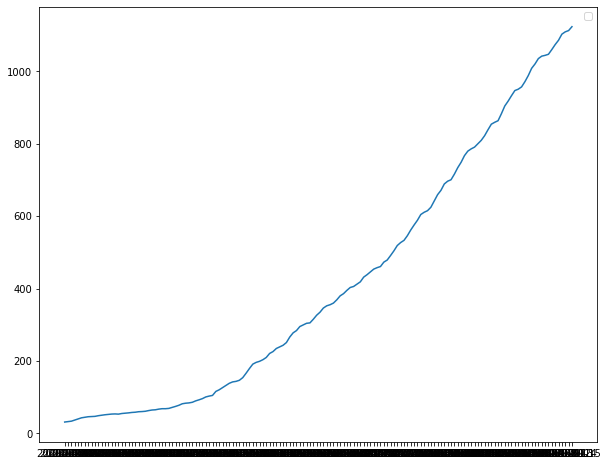

In [147]:
agg_GA = Georgia[Georgia.county.isin(border_GA)]
agg_GA.index = agg_GA.date.astype("datetime64").values
agg_GA["week"] = agg_GA.date.astype("datetime64").dt.week
plt.figure(figsize = (10,8))
agg_GA = agg_GA[(agg_GA.index > "2020-04-16") & (agg_GA.index < "2020-9-16") ]
data = agg_GA.groupby("date").mean()
plt.plot(data.index,data.cases)
plt.legend()
plt.show()

In [157]:
import plotly.graph_objects as go
import pandas as pd

data_GA = agg_GA.groupby("date").mean().diff().rolling(1).mean()
data_AL = agg_AL.groupby("date").mean().diff().rolling(1).mean()

agg_AL = Alabama[Alabama.county.isin(border_AL)]
agg_AL.index = agg_AL.date.astype("datetime64").values
agg_AL["week"] = agg_AL.date.astype("datetime64").dt.week
plt.figure(figsize = (10,8))
agg_AL = agg_AL[(agg_AL.index > "2020-01-16") & (agg_AL.index < "2020-9-16") ]

agg_GA = Georgia[Georgia.county.isin(border_GA)]
agg_GA.index = agg_GA.date.astype("datetime64").values
agg_GA["week"] = agg_GA.date.astype("datetime64").dt.week
plt.figure(figsize = (10,8))
agg_GA = agg_GA[(agg_GA.index > "2020-01-16") & (agg_GA.index < "2020-9-16") ]

# Create figure and add line
fig = go.Figure()


rolling_means = [1,7,14,30]
trace_view = np.array([False for _ in range(8)])

buttons = []

for i,rm in enumerate(rolling_means):
    
    data_GA = agg_GA.groupby("date").sum().rolling(10).sum().rolling(rm).mean().diff()
    data_AL = agg_AL.groupby("date").sum().rolling(10).sum().rolling(rm).mean().diff()
    
    fig.add_trace(go.Scatter(
        x=data_AL.index,
        y=data_AL.cases/590497,
        mode="lines",
        name = "Alabama (Mask Mandate)"
    ))

    fig.add_trace(go.Scatter(
        x=data_GA.index,
        y=data_GA.cases/755352,
        mode="lines",
        name = "Georgia (No Mask Mandate)"
    ))
    
    view = trace_view.copy()
    view[i*2:i*2+2] = True
    
    buttons.append(dict(label=str(rm) + " Day Moving Average",
         method="update",
         args=[{"visible": view},
               {"title": str(rm) + " Day Moving Average",
                "annotations": []}]) ) 
    
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=buttons
        )
    ])


# Set custom x-axis labels
fig.update_xaxes(
    ticktext=["May 16th", "June 16th","July 16th: Mandate Initiated", "August 16th", "September 16th"],
    tickvals=["2020-05-16","2020-06-16", "2020-07-16", "2020-08-16", data_AL.index.max()],
)

# Set figure title
fig.update_layout(title_text="Georgia vs Alabama Transmission Rates (Change in New Cases)")

fig.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [158]:
import plotly.graph_objects as go
import pandas as pd

# Create figure and add line
fig = go.Figure()


rolling_means = [1,7,14,30]
trace_view = np.array([False for _ in range(8)])

buttons = []

for i,rm in enumerate(rolling_means):
    
    data_GA = agg_GA.groupby("week").sum().diff()[:-1]
    data_AL = agg_AL.groupby("week").sum().diff()[:-1]
    
    fig.add_trace(go.Scatter(
        x=data_AL.index,
        y=data_AL.cases/590497,
        mode="lines",
        name = "Alabama (Mask Mandate)"
    ))

    fig.add_trace(go.Scatter(
        x=data_GA.index,
        y=data_GA.cases/755352,
        mode="lines",
        name = "Georgia (No Mask Mandate)"
    ))
    
    view = trace_view.copy()
    view[i*2:i*2+2] = True
    
    buttons.append(dict(label=str(rm) + " Day Moving Average",
         method="update",
         args=[{"visible": view},
               {"title": str(rm) + " Day Moving Average",
                "annotations": []}]) ) 
    
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=buttons
        )
    ])


# Set custom x-axis labels
fig.update_xaxes(
    ticktext=["May 16th", "June 16th","July 16th: Mandate Initiated", "August 16th", "September 16th"],
    tickvals=["2020-05-16","2020-06-16", "2020-07-16", "2020-08-16", data_AL.index.max()],
)

# Set figure title
fig.update_layout(title_text="Georgia vs Alabama Transmission Rates (Change in New Cases)")

fig.show()

In [150]:
agg_GA.groupby("date").sum().rolling(10).sum().rolling(rm).mean().diff()

,fips,cases,deaths,week
date,,,,
2020-04-17,NaN,NaN,NaN,NaN
2020-04-18,NaN,NaN,NaN,NaN
2020-04-19,NaN,NaN,NaN,NaN
2020-04-20,NaN,NaN,NaN,NaN
2020-04-21,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-09-11,0.0,1340.666667,24.100000,15.400000
2020-09-12,0.0,1333.566667,23.866667,15.400000
2020-09-13,0.0,1318.200000,23.600000,15.400000


In [151]:
agg_GA.date.astype("datetime64").dt.week

2020-04-17    16
2020-04-17    16
2020-04-17    16
2020-04-17    16
2020-04-17    16
              ..
2020-09-15    38
2020-09-15    38
2020-09-15    38
2020-09-15    38
2020-09-15    38
Name: date, Length: 1672, dtype: int64

In [152]:

data_GA 

,fips,cases,deaths
week,,,
16,NaN,NaN,NaN
17,579236.0,2272.0,87.0
18,0.0,656.0,19.0
19,0.0,446.0,19.0
20,0.0,589.0,13.0
21,0.0,936.0,35.0
22,0.0,1437.0,45.0
23,0.0,2706.0,32.0
24,0.0,3447.0,49.0


In [153]:
agg_GA.groupby("week").sum()

,fips,cases,deaths
week,,,
16,434427.0,1080,60
17,1013663.0,3352,147
18,1013663.0,4008,166
19,1013663.0,4454,185
20,1013663.0,5043,198
21,1013663.0,5979,233
22,1013663.0,7416,278
23,1013663.0,10122,310
24,1013663.0,13569,359


In [154]:
import plotly.graph_objects as go
import pandas as pd

data_GA = agg_GA.groupby("week").sum().rolling(1).mean()
data_AL = agg_AL.groupby("date").sum().rolling(1).mean()



# Create figure and add line
fig = go.Figure()


rolling_means = [1,7,14,30]
trace_view = np.array([False for _ in range(8)])

buttons = []

for i,rm in enumerate(rolling_means):
    
    data_GA = agg_GA.groupby("date").sum().rolling(10).sum().rolling(rm).mean().diff()
    data_AL = agg_AL.groupby("date").sum().rolling(10).sum().rolling(rm).mean().diff()
    
    fig.add_trace(go.Scatter(
        x=data_AL.index,
        y=data_AL.cases,
        mode="lines",
        name = "Alabama (Mask Mandate)"
    ))

    fig.add_trace(go.Scatter(
        x=data_GA.index,
        y=data_GA.cases,
        mode="lines",
        name = "Georgia (No Mask Mandate)"
    ))
    
    view = trace_view.copy()
    view[i*2:i*2+2] = True
    
    buttons.append(dict(label=str(rm) + " Day Moving Average",
         method="update",
         args=[{"visible": view},
               {"title": str(rm) + " Day Moving Average",
                "annotations": []}]) ) 
    
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=buttons
        )
    ])


# Set custom x-axis labels
fig.update_xaxes(
    ticktext=["May 16th", "June 16th","July 16th: Mandate Initiated", "August 16th", "September 16th"],
    tickvals=["2020-05-16","2020-06-16", "2020-07-16", "2020-08-16", data_AL.index.max()],
)

# Set figure title
fig.update_layout(title_text="Georgia vs Alabama Transmission Rates (Change in New Cases)")

fig.show()